### **Implementation Details**


#### **Step 3: Exploratory Analysis and Baseline Sentiment Analysis Using VADER**
abc abc to be updated





In [84]:
# Libraries

import nltk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import re
import string

# Download the lexicon
nltk.download("vader_lexicon")
from nltk.probability import FreqDist

from wordcloud import WordCloud

# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pdhiman\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [85]:
df = pd.read_pickle('../source/nlp_cleaned_df.pkl')
df.head()

,Unnamed: 0,Date,ID,location,tweet,num_of_likes,num_of_retweet,language,cleaned_tweets,final_cleaned_tweets
0,0,2022-11-07 23:59:59+00:00,1589769667765469186,"California, USA",Taking into account personal contributions &am...,2,1,en,taking into account personal contributions de...,taking account personal contribution degree ba...
1,1,2022-11-07 23:59:59+00:00,1589769667652235267,@jlo follows ♡ 01.29.21,whats your fav song?\n\n❥ I’m voting #Jennifer...,0,10,en,whats your fav song ❥ i’m voting for at the,whats fav song ❥ ’ voting
2,2,2022-11-07 23:59:59+00:00,1589769667127934977,Unknown,@MayoIsSpicyy He is allowed to speak his opini...,0,0,en,he is allowed to speak his opinion just like ...,allowed speak opinion like rest u opinion vote...
3,3,2022-11-07 23:59:59+00:00,1589769666918244352,USA,HEY NY DISTRICT 10! PLEASE VOTE FOR @danielsgo...,1,1,en,hey ny district please vote for,hey ny district please vote
4,4,2022-11-07 23:59:59+00:00,1589769666679144448,DMV,@YDanasmithdutra @BaddCompani @politicalblond ...,3,0,en,vote blue no matter who 💙🇺🇸💙🇺🇸💙🇺🇸💙🇺🇸💙🇺🇸💙,vote blue matter 💙🇺🇸💙🇺🇸💙🇺🇸💙🇺🇸💙🇺🇸💙


In [86]:
# Calculate Tokens
def unfiltered_tokens(text):
    wordtokens = nltk.word_tokenize(text)
    return wordtokens

data_tweets = df['cleaned_tweets']
unfilterd_data = list(map(unfiltered_tokens, data_tweets))
flat_unfiltered = [item for sublist in unfilterd_data for item in sublist]
# getting frequency distribution
corpus_freqdist = FreqDist(flat_unfiltered)
corpus_freqdist.most_common(20)


[('the', 17619),
 ('to', 11024),
 ('vote', 9789),
 ('for', 9609),
 ('and', 7278),
 ('i', 6733),
 ('of', 6649),
 ('a', 6292),
 ('you', 6038),
 ('’', 5889),
 ('in', 5062),
 ('is', 4944),
 ('voting', 4066),
 ('election', 3963),
 ('that', 3625),
 ('it', 3359),
 ('at', 3305),
 ('are', 3229),
 ('on', 2773),
 ('this', 2707)]

In [87]:
data_nlptweets = df['final_cleaned_tweets']
processed_data = list(map(unfiltered_tokens, data_nlptweets))
flat_processed = [item for sublist in processed_data for item in sublist]
# getting frequency distribution
corpus_freqdist2 = FreqDist(flat_processed)
corpus_freqdist2.most_common(20)

[('vote', 10204),
 ('’', 5889),
 ('election', 4288),
 ('voting', 4066),
 ('democrat', 3220),
 ('republican', 2919),
 ('people', 1967),
 ('year', 1798),
 ('tomorrow', 1567),
 ('day', 1283),
 ('im', 1236),
 ('get', 1173),
 ('like', 1132),
 ('pay', 1103),
 ('right', 1056),
 ('u', 974),
 ('favorite', 972),
 ('want', 954),
 ('red', 924),
 ('one', 919)]

In [88]:
# create counts of hate and not hate with values and words
clean_bar_counts = [x[1] for x in corpus_freqdist.most_common(20)]
clean_bar_words = [x[0] for x in corpus_freqdist.most_common(20)]

cleanNLP_bar_counts = [x[1] for x in corpus_freqdist2.most_common(20)]
cleanNLP_bar_words = [x[0] for x in corpus_freqdist2.most_common(20)]

# set the color of the bar graphs
color = cm.BuGn(np.linspace(.4,.8, 30))

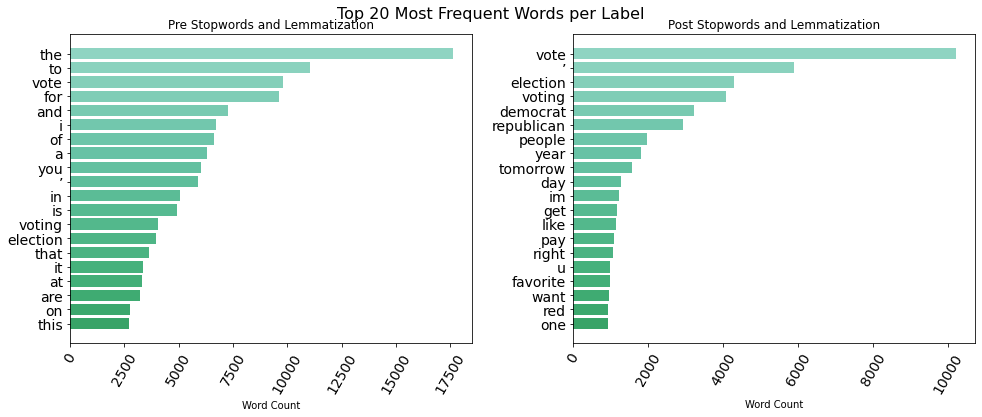

In [89]:
new_figure = plt.figure(figsize=(14,6))

ax = new_figure.add_subplot(121)
ax.invert_yaxis()

ax2 = new_figure.add_subplot(122)
ax2.invert_yaxis()

# generating a bar chart on each axes
ax.barh(clean_bar_words, clean_bar_counts, color=color)
ax2.barh(cleanNLP_bar_words, cleanNLP_bar_counts, color=color)

ax.title.set_text('Pre Stopwords and Lemmatization')
ax2.title.set_text('Post Stopwords and Lemmatization')

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=60, fontsize=14)
    plt.xlabel("Word Count")
    plt.yticks(fontsize=14)
plt.tight_layout(pad=2)

new_figure.suptitle('Top 20 Most Frequent Words per Label', fontsize=16)

plt.savefig('../visualization/label_word_count_y.png', bbox_inches = "tight", pad_inches=.5)
plt.show()

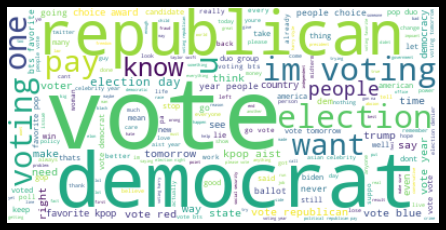

<Figure size 432x288 with 0 Axes>

In [90]:
tweet_string = ','.join(list(df['final_cleaned_tweets'].values))  ## Joining processed tweets to form a string
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')  # Wordcloud Object
word_object = wordcloud.generate(tweet_string)  ## Generating wordcloud

plt.figure(figsize=(6,6), facecolor='k')
plt.imshow(word_object, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
plt.savefig('../visualization/wordcloud.png')

* Sentiment Analysis using Vader

In [91]:
# Helper function
# format VADER's output based on compound

def format_polarity(vader_obj):
  polarity = "neutral"
  if(vader_obj['compound']>= 0.05):
    polarity = "positive"
  elif(vader_obj['compound']<= -0.05):
    polarity = "negative"
  return polarity

# get polarity
def predict_sentiment(text):
  vader_obj =  sent_analyzer.polarity_scores(text)
  return format_polarity(vader_obj)

#get vader predictions 
def get_vader_obj(text):
  vader_obj =  sent_analyzer.polarity_scores(text)
  return vader_obj

In [92]:
# Run the predictions on tweet, cleaned and nlp final columns
df["sentiment_Original"] = df["tweet"].apply(predict_sentiment)
df["sentiment_cleaned"] = df["cleaned_tweets"].apply(predict_sentiment)
df["sentiment_nlpfinal"] = df["final_cleaned_tweets"].apply(predict_sentiment)

# Vader Polarity object for final tweets
df["vader_polarity"] = df["final_cleaned_tweets"].apply(get_vader_obj)
df.head()

,Unnamed: 0,Date,ID,location,tweet,num_of_likes,num_of_retweet,language,cleaned_tweets,final_cleaned_tweets,sentiment_Original,sentiment_cleaned,sentiment_nlpfinal,vader_polarity
0,0,2022-11-07 23:59:59+00:00,1589769667765469186,"California, USA",Taking into account personal contributions &am...,2,1,en,taking into account personal contributions de...,taking account personal contribution degree ba...,positive,positive,positive,"{'neg': 0.231, 'neu': 0.491, 'pos': 0.278, 'co..."
1,1,2022-11-07 23:59:59+00:00,1589769667652235267,@jlo follows ♡ 01.29.21,whats your fav song?\n\n❥ I’m voting #Jennifer...,0,10,en,whats your fav song ❥ i’m voting for at the,whats fav song ❥ ’ voting,positive,positive,positive,"{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound..."
2,2,2022-11-07 23:59:59+00:00,1589769667127934977,Unknown,@MayoIsSpicyy He is allowed to speak his opini...,0,0,en,he is allowed to speak his opinion just like ...,allowed speak opinion like rest u opinion vote...,negative,negative,negative,"{'neg': 0.213, 'neu': 0.66, 'pos': 0.127, 'com..."
3,3,2022-11-07 23:59:59+00:00,1589769666918244352,USA,HEY NY DISTRICT 10! PLEASE VOTE FOR @danielsgo...,1,1,en,hey ny district please vote for,hey ny district please vote,positive,positive,positive,"{'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'comp..."
4,4,2022-11-07 23:59:59+00:00,1589769666679144448,DMV,@YDanasmithdutra @BaddCompani @politicalblond ...,3,0,en,vote blue no matter who 💙🇺🇸💙🇺🇸💙🇺🇸💙🇺🇸💙🇺🇸💙,vote blue matter 💙🇺🇸💙🇺🇸💙🇺🇸💙🇺🇸💙🇺🇸💙,negative,negative,neutral,"{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp..."


In [93]:
# Visualization change in Sentiment with Text processing

sentiments_orig = df['sentiment_Original'].value_counts()
sentiments_orig

positive    8143
negative    5449
neutral     5094
Name: sentiment_Original, dtype: int64

In [94]:
# Visualization change in Sentiment with Text processing

sentiments_cleanedtweets = df['sentiment_cleaned'].value_counts()
sentiments_cleanedtweets

positive    7676
negative    5741
neutral     5269
Name: sentiment_cleaned, dtype: int64

In [95]:
# Visualization change in Sentiment with Text processing

sentiments_nlpcleaned = df['sentiment_nlpfinal'].value_counts()
sentiments_nlpcleaned

positive    7971
negative    5361
neutral     5354
Name: sentiment_nlpfinal, dtype: int64

([<matplotlib.patches.Wedge at 0x20400a479a0>,
 [Text(-1.099592584521943, 0.02993573223347142, 'Neutral'),
  Text(0.6977680541572018, -0.8503644763262824, 'Positive'),
  Text(0.6932947240636452, 0.8540154715141374, 'Negative')],
 [Text(-0.5997777733756051, 0.016328581218257136, '43.6%'),
  Text(0.3806007568130191, -0.4638351689052449, '29.2%'),
  Text(0.37816075858017006, 0.46582662082589305, '27.3%')])

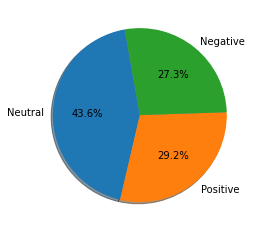

In [96]:
labels = ['Neutral', 'Positive', 'Negative']
fig1, ax1 = plt.subplots()
ax1.pie(sentiments_orig, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=100)

([<matplotlib.patches.Wedge at 0x204009cebb0>,
 [Text(-1.0938571098848464, 0.11608885887272327, 'Neutral'),
  Text(0.6021001665786146, -0.9205842652392038, 'Positive'),
  Text(0.7181178267869224, 0.8332507346836412, 'Negative')],
 [Text(-0.5966493326644616, 0.06332119574875815, '41.1%'),
  Text(0.3284182726792443, -0.5021368719486565, '30.7%'),
  Text(0.3917006327928667, 0.45450040073653153, '28.2%')])

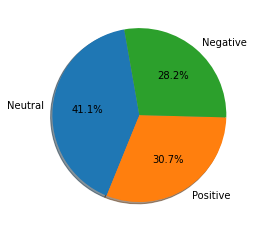

In [97]:
labels = ['Neutral', 'Positive', 'Negative']
fig1, ax1 = plt.subplots()
ax1.pie(sentiments_cleanedtweets, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=100)

([<matplotlib.patches.Wedge at 0x2040090eca0>,
 [Text(-1.0982673153019504, 0.06171631987932047, 'Neutral'),
  Text(0.6342205863023731, -0.8987570572241836, 'Positive'),
  Text(0.7299518470318463, 0.8229035794154721, 'Negative')],
 [Text(-0.5990548992556092, 0.03366344720690207, '42.7%'),
  Text(0.3459385016194762, -0.4902311221222819, '28.7%'),
  Text(0.3981555529264616, 0.4488564978629847, '28.7%')])

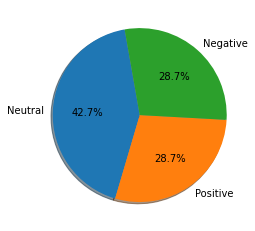

In [98]:
labels = ['Neutral', 'Positive', 'Negative']
fig1, ax1 = plt.subplots()
ax1.pie(sentiments_nlpcleaned, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=100)

* Parsing Polarity Scores

In [99]:
df.head()

,Unnamed: 0,Date,ID,location,tweet,num_of_likes,num_of_retweet,language,cleaned_tweets,final_cleaned_tweets,sentiment_Original,sentiment_cleaned,sentiment_nlpfinal,vader_polarity
0,0,2022-11-07 23:59:59+00:00,1589769667765469186,"California, USA",Taking into account personal contributions &am...,2,1,en,taking into account personal contributions de...,taking account personal contribution degree ba...,positive,positive,positive,"{'neg': 0.231, 'neu': 0.491, 'pos': 0.278, 'co..."
1,1,2022-11-07 23:59:59+00:00,1589769667652235267,@jlo follows ♡ 01.29.21,whats your fav song?\n\n❥ I’m voting #Jennifer...,0,10,en,whats your fav song ❥ i’m voting for at the,whats fav song ❥ ’ voting,positive,positive,positive,"{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound..."
2,2,2022-11-07 23:59:59+00:00,1589769667127934977,Unknown,@MayoIsSpicyy He is allowed to speak his opini...,0,0,en,he is allowed to speak his opinion just like ...,allowed speak opinion like rest u opinion vote...,negative,negative,negative,"{'neg': 0.213, 'neu': 0.66, 'pos': 0.127, 'com..."
3,3,2022-11-07 23:59:59+00:00,1589769666918244352,USA,HEY NY DISTRICT 10! PLEASE VOTE FOR @danielsgo...,1,1,en,hey ny district please vote for,hey ny district please vote,positive,positive,positive,"{'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'comp..."
4,4,2022-11-07 23:59:59+00:00,1589769666679144448,DMV,@YDanasmithdutra @BaddCompani @politicalblond ...,3,0,en,vote blue no matter who 💙🇺🇸💙🇺🇸💙🇺🇸💙🇺🇸💙🇺🇸💙,vote blue matter 💙🇺🇸💙🇺🇸💙🇺🇸💙🇺🇸💙🇺🇸💙,negative,negative,neutral,"{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp..."


In [100]:
df_polarity = df.drop(['Unnamed: 0', 'Date', 'ID', 'location', 'tweet', 'num_of_likes','num_of_retweet', 'language' , 'cleaned_tweets' ,'sentiment_Original' , 'sentiment_cleaned'], axis=1)

In [101]:
df_polarity_scores = df_polarity['vader_polarity'].apply(pd.Series)

In [102]:
df_polarity_scores.head()

,neg,neu,pos,compound
0,0.231,0.491,0.278,0.5994
1,0.000,0.500,0.500,0.4588
2,0.213,0.660,0.127,-0.4019
3,0.000,0.635,0.365,0.3182
4,0.000,0.732,0.268,0.0258


In [103]:
df_m1 = df[['final_cleaned_tweets','sentiment_nlpfinal']].copy()

In [104]:
df_merge = pd.merge(left=df_m1, left_index=True , right=df_polarity_scores, right_index= True, how='inner')

In [105]:
df_merge.head()

,final_cleaned_tweets,sentiment_nlpfinal,neg,neu,pos,compound
0,taking account personal contribution degree ba...,positive,0.231,0.491,0.278,0.5994
1,whats fav song ❥ ’ voting,positive,0.000,0.500,0.500,0.4588
2,allowed speak opinion like rest u opinion vote...,negative,0.213,0.660,0.127,-0.4019
3,hey ny district please vote,positive,0.000,0.635,0.365,0.3182
4,vote blue matter 💙🇺🇸💙🇺🇸💙🇺🇸💙🇺🇸💙🇺🇸💙,neutral,0.000,0.732,0.268,0.0258


In [106]:
scores_df = df_merge.groupby('sentiment_nlpfinal')['pos'].mean().reset_index(name='avg_positive')
scores_df['avg_neutral'] = df_merge.groupby('sentiment_nlpfinal')['neu'].mean()
scores_df['avg_negative'] = df_merge.groupby('sentiment_nlpfinal')['neg'].mean()
scores_df['avg_compound'] = df_merge.groupby('sentiment_nlpfinal')['compound'].mean()

scores_df.head()

,sentiment_nlpfinal,avg_positive,avg_neutral,avg_negative,avg_compound
0,negative,0.071042,NaN,NaN,NaN
1,neutral,0.011683,NaN,NaN,NaN
2,positive,0.334592,NaN,NaN,NaN
